In [19]:
import argparse
import os
import time
import copy
import six
import sys
#import torch
import numpy as np


import matplotlib.pyplot as plt

#######
sys.path.append('/home/jbonato/Documents/cvpr_clvision_challenge/')
from core50.dataset import CORE50
dataset = CORE50(root='/home/jbonato/Documents/cvpr_clvision_challenge/core50/data/', scenario='ni',preload=True)


Loading data...
Loading paths...
Loading LUP...
Loading labels...
preparing CL benchmark...


In [20]:
full_testset = dataset.get_full_test_set()


In [31]:
full_testset[0][0][0].shape


(44972, 128, 128, 3)

In [3]:
full_testsetl = pretrainedmodels.__dict__["se_resnext101_32x4d"](num_classes=1000, pretrained='imagenet')


In [23]:
num = 0
for child in model.children():
    print(num,'qqqq',child)
    num+=1


0 qqqq Sequential(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
)
1 qqqq Sequential(
  (0): SEResNeXtBottleneck(
    (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (se_module): SEModule(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)

In [8]:
# qq = model.features

In [33]:
import torch.nn as nn
import torch

class DIM_model(nn.Module):
    def __init__(self,batch_s = 32,num_classes =64,feature=False):
        super().__init__()
        
        #model_ft = models.resnext101_32x8d(pretrained=True)#resnet18
        model_ft = pretrainedmodels.__dict__["se_resnext101_32x4d"](num_classes=1000, pretrained='imagenet')
        num_ftrs = model_ft.last_linear.in_features
        model_ft.last_linear = nn.Linear(num_ftrs, num_classes)
        
        self.encoder = nn.Sequential(*list(model_ft.children())[:5])
        self.head =  nn.AdaptiveAvgPool2d((1, 1))
        self.head2 = model_ft.last_linear
        
    def forward(self,x):
        C_phi = self.encoder(x)
        print(C_phi.size())
        buff = self.head(C_phi)
        print(buff.size())
        buff = torch.flatten(buff, 1)
        E_phi = self.head2(buff)
        print(C_phi.size(),E_phi.size())
        return C_phi


In [34]:
fake_in = torch.ones([2,3,128,128])
mm = DIM_model()
mm(fake_in)

torch.Size([2, 2048, 4, 4])
torch.Size([2, 2048, 1, 1])
torch.Size([2, 2048, 4, 4]) torch.Size([2, 64])


tensor([[[[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.6844, 0.0000, 0.0000, 0.0000],
          [0.0000, 1.7799, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.6914, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.2565, 0.0000]],

         ...,

         [[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.3953]],

         [[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.3905, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.5818, 0.0000],
       

In [11]:
# fig,ax = plt.subplots(figsize=(15,10),ncols=5,nrows=2)
# for i in range(10):
#     qqq =data0[lab0==i,:,:,:]
#     ax[i//(5),i%(5)].imshow(qqq[0].astype(np.uint8))

Batch number: 8


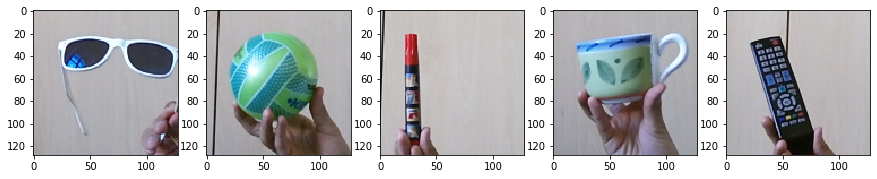

In [13]:
data,lab,t = dataset.next()

fig,ax = plt.subplots(figsize=(15,10),ncols=5,nrows=1)
for i in range((t+1)*5,(t+1)*5+5):
    qqq =data[lab==i,:,:,:]
    ax[i%(5)].imshow(qqq[0].astype(np.uint8))

In [7]:
case = {'0':None,'1':'B','2':'A','3':'B','4':'A','5':'A','6':'A','7':'B','8':'B'}

1

In [14]:
test =  dataset.get_full_valid_set(reduced=True)

In [28]:
test[3][1]

3

Batch number: 4


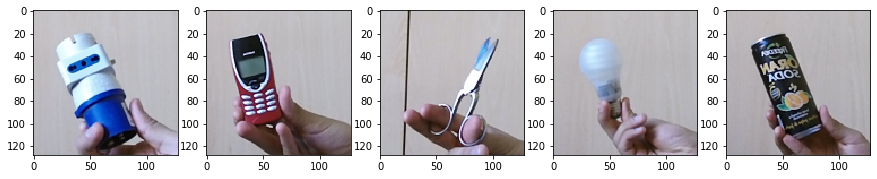

In [17]:
data,lab,t = dataset.next()
fig,ax = plt.subplots(figsize=(15,10),ncols=5,nrows=1)
for i in range(5):
    qqq =data0[lab0==i,:,:,:]
    ax[i%(5)].imshow(qqq[0].astype(np.uint8))

IndexError: index 1 is out of bounds for axis 0 with size 1

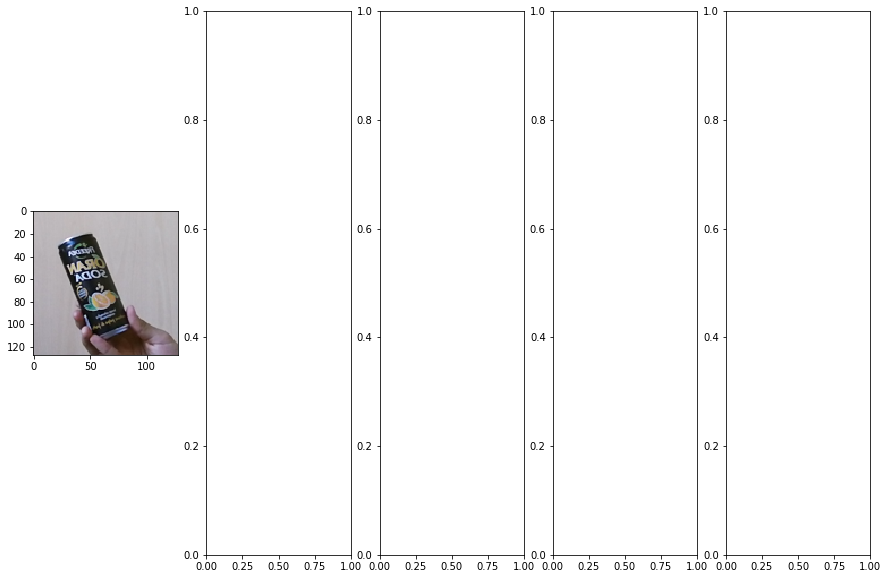